# Load Dataset

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

work_dir = "../data"

In [3]:
files = os.listdir(work_dir)
print(files)
test_dataset = pd.read_csv(os.path.join(work_dir, files[1]))
train_dataset = pd.read_csv(os.path.join(work_dir, files[2]))
submission_sample = pd.read_csv(os.path.join(work_dir, files[0]))

['gender_submission.csv', 'test.csv', 'train.csv']


# Submission Sample

In [4]:
submission_sample

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
train_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# All data null check

In [6]:
print("----train----")
print(train_dataset.count())
print("----test----")
print(test_dataset.count())

----train----
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
----test----
PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64


### Sex distribution

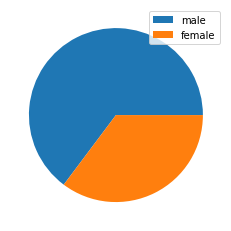

In [7]:
target = train_dataset["Sex"].value_counts()
plt.pie(target)
plt.legend(target.index)
plt.show()

### SibSp

In [8]:
gb = train_dataset.groupby("SibSp")
for g in gb:
    print(f"group:{g[0]}")
    print("survived:", (g[1]["Survived"] == 1).sum()/((g[1]["Survived"] == 1).sum() + (g[1]["Survived"] == 0).sum()))

group:0
survived: 0.34539473684210525
group:1
survived: 0.5358851674641149
group:2
survived: 0.4642857142857143
group:3
survived: 0.25
group:4
survived: 0.16666666666666666
group:5
survived: 0.0
group:8
survived: 0.0


### Parch

In [9]:
gb = train_dataset.groupby("Parch")
for g in gb:
    print(f"group:{g[0]}")
    print("survived:", (g[1]["Survived"] == 1).sum()/((g[1]["Survived"] == 1).sum() + (g[1]["Survived"] == 0).sum()))

group:0
survived: 0.34365781710914456
group:1
survived: 0.5508474576271186
group:2
survived: 0.5
group:3
survived: 0.6
group:4
survived: 0.0
group:5
survived: 0.2
group:6
survived: 0.0


### Age distribution

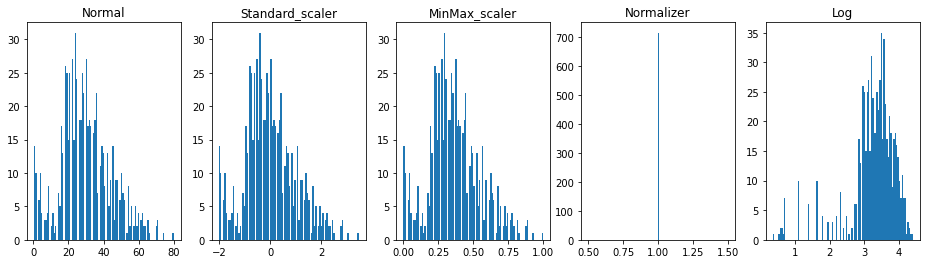

In [10]:
fig, ax = plt.subplots(1, 5, figsize=(16,4))

target = train_dataset["Age"].dropna()
ax[0].set_title("Normal")
ax[0].hist(target, bins = 100)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
standard_scaler = StandardScaler()
ax[1].hist(standard_scaler.fit_transform(target.values.reshape(-1,1)), bins = 100)
ax[1].set_title("Standard_scaler")

minmax_scaler = MinMaxScaler()
ax[2].hist(minmax_scaler.fit_transform(target.values.reshape(-1,1)), bins = 100)
ax[2].set_title("MinMax_scaler")

normalizer = Normalizer()
ax[3].hist(normalizer.fit_transform(target.values.reshape(-1,1)), bins = 100)
ax[3].set_title("Normalizer")

ax[4].set_title("Log")
ax[4].hist(np.log1p(target), bins = 100)

plt.show()

### Cabin distribution

<AxesSubplot:>

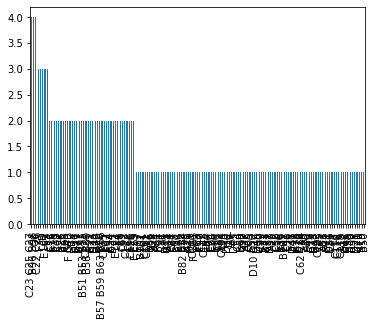

In [11]:
train_dataset["Cabin"].value_counts().plot(kind="bar")

### Embarked distribution

<AxesSubplot:>

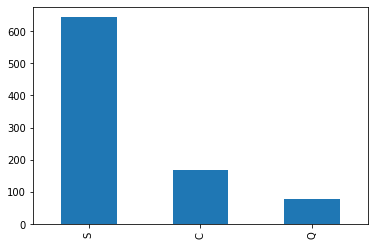

In [12]:
train_dataset["Embarked"].value_counts().plot(kind="bar")

### Fare distribution

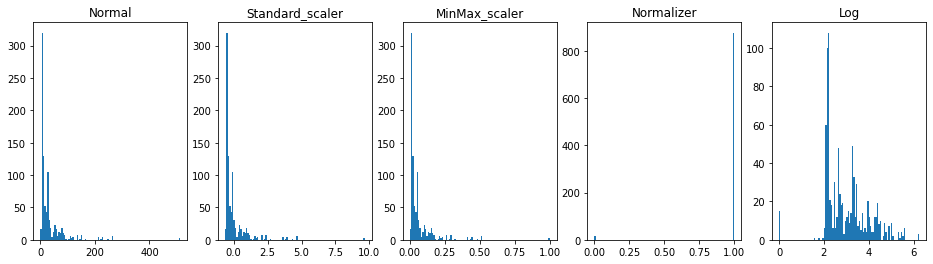

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(16,4))

target = train_dataset["Fare"].dropna()
ax[0].set_title("Normal")
ax[0].hist(target, bins = 100)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
standard_scaler = StandardScaler()
ax[1].hist(standard_scaler.fit_transform(target.values.reshape(-1,1)), bins = 100)
ax[1].set_title("Standard_scaler")

minmax_scaler = MinMaxScaler()
ax[2].hist(minmax_scaler.fit_transform(target.values.reshape(-1,1)), bins = 100)
ax[2].set_title("MinMax_scaler")

normalizer = Normalizer()
ax[3].hist(normalizer.fit_transform(target.values.reshape(-1,1)), bins = 100)
ax[3].set_title("Normalizer")

ax[4].set_title("Log")
ax[4].hist(np.log1p(target), bins = 100)

plt.show()

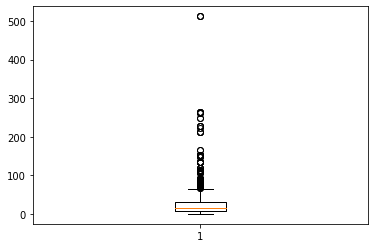

In [14]:
plt.boxplot(train_dataset["Fare"].dropna())
plt.show()

##### relation between sex and survived

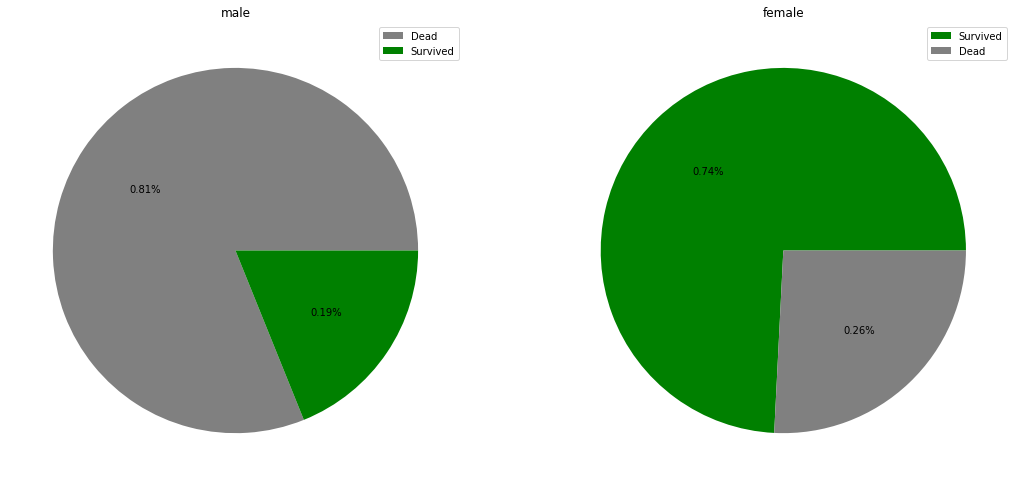

In [15]:
male = train_dataset[train_dataset["Sex"] == "male"]
female = train_dataset[train_dataset["Sex"] == "female"]
target = male["Survived"].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(18,10))

legends_dict = {
    1:"Survived",
    0:"Dead"
}

color_dict = {
    1:"green",
    0:"gray"
}

ax[0].pie(
    target,
    colors=[color_dict[c] for c in target.sort_values(ascending=False).index],
    autopct=lambda x : f"{round(x * 0.01, 2)}%"
)
ax[0].legend(target.index.map(legends_dict))
ax[0].set_title("male")

target = female["Survived"].value_counts()
ax[1].pie(
    target,
    colors=[color_dict[c] for c in target.sort_values(ascending=False).index],
    autopct=lambda x : f"{round(x * 0.01, 2)}%"
)
ax[1].legend(target.index.map(legends_dict))
ax[1].set_title("female")
plt.show()

##### relation between Pclass and survived

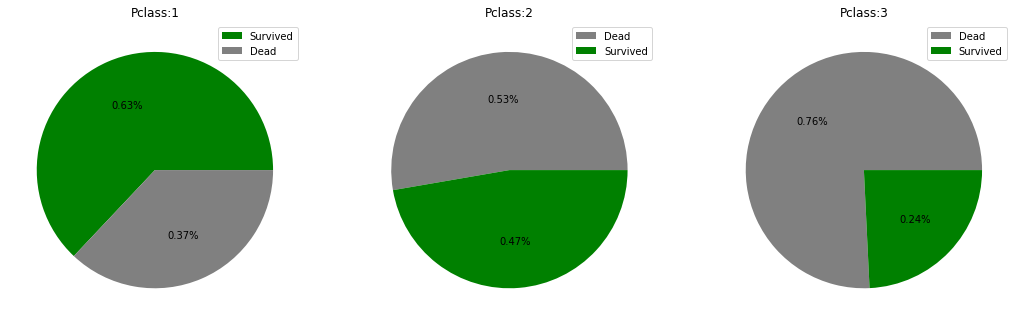

In [16]:
gby = train_dataset.groupby("Pclass")
fig, ax = plt.subplots(1, 3, figsize=(18,8))
for index, gb in enumerate(gby):
    label = gb[0]
    data_sub = gb[1]
    
    target = data_sub["Survived"].value_counts()
    ax[index].pie(
        target,
        colors=[color_dict[c] for c in target.sort_values(ascending=False).index],
        autopct=lambda x : f"{round(x * 0.01, 2)}%"
    )
    ax[index].legend(target.index.map(legends_dict))
    ax[index].set_title(f"Pclass:{label}")
plt.show()

# Preprocessing

In [17]:
# copy target
train_copy = train_dataset.copy()
test_copy = test_dataset.copy()

### making new param

In [35]:
import re

reg = re.compile(" (?P<title>[A-Za-z]+)\.")
reg.search("Braund, Mr. Owen Harris").group("title")
train_copy["Name_Title"] = train_copy["Name"].map(lambda x:reg.search(x).group("title"))
test_copy["Name_Title"] = test_copy["Name"].map(lambda x:reg.search(x).group("title"))

### padding dataset

In [36]:
# padding rule: median

# age
train_copy["Null_Age"] = train_copy["Age"].isna() + 0.0
train_copy["Age"] = train_copy["Age"].fillna(0.0)
test_copy["Null_Age"] = test_copy["Age"].isna() + 0.0
test_copy["Age"] = test_copy["Age"].fillna(0.0)

# cabin
train_copy["Cabin"] = train_copy["Cabin"].fillna("")
test_copy["Cabin"] = test_copy["Cabin"].fillna("")

# embarked
train_copy["Embarked"] = train_copy["Embarked"].fillna("")
test_copy["Embarked"] = test_copy["Embarked"].fillna("")

# fare
train_copy["Null_Fare"] = train_copy["Fare"].isna() + 0.0
train_copy["Fare"] = train_copy["Fare"].fillna(0.0)
test_copy["Null_Fare"] = test_copy["Fare"].isna() + 0.0
test_copy["Fare"] = test_copy["Fare"].fillna(0.0)

train_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Null_Age,Null_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,3.135494,1,0,A/5 21171,2.110213,,S,Mr,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.663562,1,0,PC 17599,4.280593,C85,C,Mrs,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.295837,0,0,STON/O2. 3101282,2.188856,,S,Miss,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.583519,1,0,113803,3.990834,C123,S,Mrs,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,3.583519,0,0,373450,2.202765,,S,Mr,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3.332205,0,0,211536,2.639057,,S,Rev,0.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,2.995732,0,0,112053,3.433987,B42,S,Miss,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.000000,1,2,W./C. 6607,3.196630,,S,Miss,0.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,3.295837,0,0,111369,3.433987,C148,C,Mr,0.0,0.0


### reduce range : Log

In [37]:
train_copy["Fare"] = np.log1p(train_copy["Fare"])
test_copy["Fare"] = np.log1p(test_copy["Fare"])

train_copy["Age"] = np.log1p(train_copy["Age"])
test_copy["Age"] = np.log1p(test_copy["Age"])

# one_hot encoding on object type

In [39]:
# search dtypes
print(train_copy.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Name_Title      object
Null_Age       float64
Null_Fare      float64
dtype: object


In [42]:
object_dtype_columns = train_copy.columns[train_copy.dtypes == "object"].tolist()
object_dtype_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_Title']

In [43]:
object_dtype_columns = object_dtype_columns + ["SibSp", "Parch"]
object_dtype_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_Title', 'SibSp', 'Parch']

In [44]:
from sklearn.preprocessing import OneHotEncoder

except_list = ["Name", "Cabin"]
for c in object_dtype_columns:
    if c in except_list:
        continue
    # define encoder
    onehot_encoder = OneHotEncoder(handle_unknown="ignore")
    # fitting
    onehot_encoder.fit(train_copy[c].values.reshape(-1,1))
    
    # train data
    # transform
    val = onehot_encoder.transform(train_copy[c].values.reshape(-1,1)).toarray()
    # concatenate encoded data
    columns = [c + "_" + str(lab) for lab in list(range(val.shape[1]))]
    df_tmp = pd.DataFrame(val, columns=columns)
    train_copy = pd.concat([train_copy, df_tmp], axis=1)
    train_copy.drop(c, axis=1, inplace=True)
    
    
    # test data
    # transform
    val = onehot_encoder.transform(test_copy[c].values.reshape(-1,1)).toarray()
    # concatenate encoded data
    columns = [c + "_" + str(lab) for lab in list(range(val.shape[1]))]
    df_tmp = pd.DataFrame(val, columns=columns)
    test_copy = pd.concat([test_copy, df_tmp], axis=1)
    test_copy.drop(c, axis=1, inplace=True)
    
    
    
    
train_copy.drop(["Name", "PassengerId"], axis=1, inplace=True)
test_copy.drop(["Name"], axis=1, inplace=True)
test_copy

,PassengerId,Pclass,Age,Fare,Cabin,Null_Age,Null_Fare,Sex_0,Sex_1,Ticket_0,...,SibSp_4,SibSp_5,SibSp_6,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,892,3,1.519411,1.156272,,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,893,3,1.583341,1.124748,,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,894,2,1.637663,1.214638,,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,895,3,1.466077,1.184255,,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,896,3,1.419607,1.277267,,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.000000,1.164014,,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
414,1306,1,1.545194,1.740391,C105,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415,1307,3,1.542507,1.134691,,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
416,1308,3,0.000000,1.164014,,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# ordinal encoding on Ticket

In [23]:
# from sklearn.preprocessing import OrdinalEncoder

# column = "Ticket"

# # define encoder
# ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
# # fitting
# ordinal_encoder.fit(train_copy[column].values.reshape(-1,1))

# val = ordinal_encoder.transform(train_copy[column].values.reshape(-1,1))
# train_copy["Ticket"] = val
# val = ordinal_encoder.transform(test_copy[column].values.reshape(-1,1))
# test_copy["Ticket"] = val
# test_copy

#  Label binarizer

In [45]:
from sklearn.preprocessing import LabelBinarizer
col_name = "Cabin"

label_binarizer = LabelBinarizer()
label_binarizer.fit([val for vals in train_dataset[col_name].fillna("OOV").str.split(" ") for val in vals])

# train
val = label_binarizer.transform(train_dataset[col_name].fillna("OOV"))
# concatenate encoded data
columns = [col_name + "_" + str(lab) for lab in list(range(val.shape[1]))]
df_tmp = pd.DataFrame(val, columns=columns)
train_copy = pd.concat([train_copy, df_tmp], axis=1)
train_copy.drop(col_name, axis=1, inplace=True)

# test
val = label_binarizer.transform(test_dataset[col_name].fillna("OOV"))
# concatenate encoded data
columns = [col_name + "_" + str(lab) for lab in list(range(val.shape[1]))]
df_tmp = pd.DataFrame(val, columns=columns)
test_copy = pd.concat([test_copy, df_tmp], axis=1)
test_copy.drop(col_name, axis=1, inplace=True)

# Sacaler

In [46]:
from sklearn.preprocessing import StandardScaler



In [47]:
# check object columns
(train_copy.dtypes == "object").sum()

0

# Trainning

### Split dataset

In [48]:
from sklearn.model_selection import train_test_split

target_data = train_copy["Survived"]
train_data = train_copy.drop(["Survived"], axis=1)

train_X, test_X, train_y, test_y = train_test_split(train_data, target_data, random_state=0, train_size=0.9)

In [49]:
train_X

,Pclass,Age,Fare,Null_Age,Null_Fare,Sex_0,Sex_1,Ticket_0,Ticket_1,Ticket_2,...,Cabin_152,Cabin_153,Cabin_154,Cabin_155,Cabin_156,Cabin_157,Cabin_158,Cabin_159,Cabin_160,Cabin_161
815,1,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
877,3,1.385227,1.158634,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
193,2,0.869742,1.457646,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
523,1,1.570003,1.624757,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
634,3,1.194706,1.473353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1,1.545194,1.692436,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
192,3,1.385227,1.157162,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
629,3,0.000000,1.152830,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
559,3,1.528427,1.364138,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


### Neural Network

In [54]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
import tensorflow as tf

tf.random.set_seed(0)

input_shape = train_X.shape[1]

input_ = Input(shape=(input_shape,))
layer = Dense(2000, activation="relu")(input_)
layer = BatchNormalization()(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1700, activation="relu")(layer)
layer = BatchNormalization()(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1700, activation="relu")(layer)
layer = BatchNormalization()(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1700, activation="relu")(layer)
layer = Dense(2, activation="sigmoid")(layer)
model = Model(inputs=input_, outputs=layer)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 885)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              1772000   
_________________________________________________________________
batch_normalization (BatchNo (None, 2000)              8000      
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1700)              3401700   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1700)              6800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1700)              0   

### compile & define callbacks

In [55]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None
)
callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0),
    ModelCheckpoint(filepath='../model/model.h5', verbose=1, save_best_only=True)
]

### one_hot_encoding target data

In [56]:
# define encoder
onehot_encoder = OneHotEncoder()
# fitting
onehot_encoder.fit(train_y.values.reshape(-1,1))

one_hot_train_y = onehot_encoder.transform(train_y.values.reshape(-1,1)).toarray()
one_hot_test_y = onehot_encoder.transform(test_y.values.reshape(-1,1)).toarray()

### fitting

In [57]:
history = model.fit(
    x=train_X,
    y=one_hot_train_y,
    batch_size=8,
    epochs=100,
    verbose=1,
    callbacks=callbacks,
    validation_data=(test_X, one_hot_test_y),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None
)

Epoch 1/100
101/101 [==============================] - 5s 41ms/step - loss: 2.6845 - accuracy: 0.6667 - val_loss: 0.5884 - val_accuracy: 0.7444

Epoch 00001: val_loss improved from inf to 0.58841, saving model to ../model\model.h5
Epoch 2/100
101/101 [==============================] - 4s 39ms/step - loss: 0.8857 - accuracy: 0.7366 - val_loss: 0.5891 - val_accuracy: 0.8111

Epoch 00002: val_loss did not improve from 0.58841
Epoch 3/100
101/101 [==============================] - 4s 38ms/step - loss: 0.5221 - accuracy: 0.7840 - val_loss: 0.5536 - val_accuracy: 0.8111

Epoch 00003: val_loss improved from 0.58841 to 0.55358, saving model to ../model\model.h5
Epoch 4/100
101/101 [==============================] - 4s 39ms/step - loss: 0.3752 - accuracy: 0.8527 - val_loss: 0.3898 - val_accuracy: 0.8556

Epoch 00004: val_loss improved from 0.55358 to 0.38981, saving model to ../model\model.h5
Epoch 5/100
101/101 [==============================] - 4s 39ms/step - loss: 0.2972 - accuracy: 0.8851 -

In [58]:
from sklearn.model_selection import cross_val_score

# predict test

In [59]:
from tensorflow.keras.models import load_model
model = load_model('../model/model.h5')


In [60]:
pred = np.argmax(model.predict(test_copy.drop("PassengerId", axis=1)), axis=1).tolist()

In [61]:
result = pd.DataFrame()
result["PassengerId"] = test_copy["PassengerId"].copy()
result["Survived"] = pred

# Cross Validation

In [63]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
import tensorflow as tf

kf = KFold(n_splits=10, random_state=0, shuffle=True)
results = []
for train_index, test_index in kf.split(train_copy):
    
    data = train_copy.loc[train_index]
    target_data = data["Survived"]
    train_data = data.drop(["Survived"], axis=1)

    train_X, test_X, train_y, test_y = train_test_split(train_data, target_data, random_state=0)
    
    tf.random.set_seed(0)

    input_shape = train_X.shape[1]

    input_ = Input(shape=(input_shape,))
    layer = Dense(2000, activation="relu")(input_)
    layer = BatchNormalization()(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1700, activation="relu")(layer)
    layer = BatchNormalization()(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1700, activation="relu")(layer)
    layer = BatchNormalization()(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1700, activation="relu")(layer)
    layer = Dense(2, activation="sigmoid")(layer)
    model = Model(inputs=input_, outputs=layer)
    
    model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None
    )
    # define encoder
    onehot_encoder = OneHotEncoder()
    # fitting
    onehot_encoder.fit(train_y.values.reshape(-1,1))

    one_hot_train_y = onehot_encoder.transform(train_y.values.reshape(-1,1)).toarray()
    one_hot_test_y = onehot_encoder.transform(test_y.values.reshape(-1,1)).toarray()
    history = model.fit(
        x=train_X,
        y=one_hot_train_y,
        batch_size=8,
        epochs=100,
        verbose=1,
        callbacks=callbacks,
        validation_data=(test_X, one_hot_test_y),
        shuffle=True,
        class_weight=None,
        sample_weight=None,
        initial_epoch=0,
        steps_per_epoch=None,
        validation_steps=None
    )
    model = load_model('../model/model.h5')
    pred = np.argmax(model.predict(test_X), axis=1).tolist()
    result = pd.DataFrame()
    result["pred"] = pred
    result["ans"] = test_y.tolist()
    results.append(result)
all_results = pd.concat(results)
indices = [i*201 for i in range(1,11)]
before = 0
for i in indices:
    tmp = all_results.iloc[before : i]
    print((tmp["pred"] == tmp["ans"]).sum() / tmp.shape[0])
    before = i
print("all result")
(all_results["pred"] == all_results["ans"]).sum() / all_results.shape[0]

Epoch 1/100
75/75 [==============================] - 4s 40ms/step - loss: 2.8060 - accuracy: 0.6750 - val_loss: 0.5383 - val_accuracy: 0.8010

Epoch 00001: val_loss did not improve from 0.38981
Epoch 2/100
75/75 [==============================] - 3s 38ms/step - loss: 0.9675 - accuracy: 0.7517 - val_loss: 0.4842 - val_accuracy: 0.8209

Epoch 00002: val_loss did not improve from 0.38981
Epoch 3/100
75/75 [==============================] - 3s 38ms/step - loss: 0.5868 - accuracy: 0.7983 - val_loss: 0.5799 - val_accuracy: 0.6667

Epoch 00003: val_loss did not improve from 0.38981
Epoch 4/100
75/75 [==============================] - 3s 39ms/step - loss: 0.4888 - accuracy: 0.8250 - val_loss: 0.6600 - val_accuracy: 0.5224

Epoch 00004: val_loss did not improve from 0.38981
Epoch 5/100
75/75 [==============================] - 3s 38ms/step - loss: 0.3436 - accuracy: 0.8800 - val_loss: 0.4246 - val_accuracy: 0.8408

Epoch 00005: val_loss did not improve from 0.38981
Epoch 6/100
75/75 [===========

76/76 [==============================] - 3s 40ms/step - loss: 0.4022 - accuracy: 0.8586 - val_loss: 0.5571 - val_accuracy: 0.7413

Epoch 00005: val_loss did not improve from 0.37207
Epoch 6/100
76/76 [==============================] - 3s 40ms/step - loss: 0.2786 - accuracy: 0.8935 - val_loss: 0.4539 - val_accuracy: 0.7960

Epoch 00006: val_loss did not improve from 0.37207
Epoch 7/100
76/76 [==============================] - 3s 40ms/step - loss: 0.1900 - accuracy: 0.9301 - val_loss: 0.6633 - val_accuracy: 0.7960

Epoch 00007: val_loss did not improve from 0.37207
Epoch 8/100
76/76 [==============================] - 3s 40ms/step - loss: 0.2880 - accuracy: 0.9002 - val_loss: 0.6712 - val_accuracy: 0.8209

Epoch 00008: val_loss did not improve from 0.37207
Epoch 9/100
76/76 [==============================] - 3s 40ms/step - loss: 0.1872 - accuracy: 0.9384 - val_loss: 1.0051 - val_accuracy: 0.8259

Epoch 00009: val_loss did not improve from 0.37207
Epoch 1/100
76/76 [=======================

0.8736318407960199

In [72]:
test_copy.drop("PassengerId")

,PassengerId,Pclass,Age,Fare,Null_Age,Null_Fare,Sex_0,Sex_1,Ticket_0,Ticket_1,...,Cabin_152,Cabin_153,Cabin_154,Cabin_155,Cabin_156,Cabin_157,Cabin_158,Cabin_159,Cabin_160,Cabin_161
0,892,3,1.519411,1.156272,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,893,3,1.583341,1.124748,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,894,2,1.637663,1.214638,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,895,3,1.466077,1.184255,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,896,3,1.419607,1.277267,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.000000,1.164014,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
414,1306,1,1.545194,1.740391,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
415,1307,3,1.542507,1.134691,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
416,1308,3,0.000000,1.164014,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [77]:
model = load_model('../model/model.h5')
pred = np.argmax(model.predict(test_copy.drop("PassengerId", axis=1)), axis=1).tolist()
result = pd.DataFrame()
result["PassengerId"] = test_copy["PassengerId"]
result["Survived"] = pred
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [78]:
result.to_csv("../result/submission_0731.csv", index=False)